<a href="https://colab.research.google.com/github/xmendevs/EDA-Social-media-Sentiment/blob/main/EDA_Task_Social.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS On Social Media Sentiment Analysis Dataset

## • Importing & Understanding the dataset

In [32]:
# Importing Necessary Libraries For Analysis
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [33]:
# importing our dataset
df = pd.read_csv('/content/Social_media_sentiment_analysis_dataset.csv')

### • Understanding the Data

In [34]:
# Checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


### • Data Head

In [35]:
# Checking First ten(10) Columns in the Data
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
5,5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9
6,6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14
7,7,7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19
8,8,8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8
9,9,9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12


In [36]:
# Checking data Columns
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [37]:
# Reducing the total Columns by removing two Unnecesary columns)
df = df[[#'Unnamed: 0.1', 'Unnamed: 0',
    'User', 'Sentiment', 'Timestamp', 'Text',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour']].copy()

In [38]:
# Ensuring that df holds the actual number of columns I want in the df
df.columns

Index(['User', 'Sentiment', 'Timestamp', 'Text', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')



---



## • Statistics Summary

In [39]:
# Summarizing Common Statistical Values on The Data
df.describe()

,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [40]:
# Gettting median
df.median(numeric_only=True)

,0
Retweets,22.0
Likes,43.0
Year,2021.0
Month,6.0
Day,15.0
Hour,16.0


In [41]:
# Getting the mode
df.mode(numeric_only=True)

,Retweets,Likes,Year,Month,Day,Hour
0,22.0,45.0,2023,2,15,14




---





---



## • Data correlation


#### • Data correlation between two variables

In [18]:
# creating data correlation
#types of corr. include btw two variables and multi-variables
# correlation btw Retweets and likes
correlation = df['Retweets'].corr(df['Likes'])
print(f"Correlation btw Retweets & Like : {correlation}")  # using two vars.

Correlation btw Retweets & Like : 0.9984821119176832


#### • Data correlation between Multi variables

In [19]:
# using multi variables to check correlation
df_corr = df[['Likes','Retweets','Year', 'Month', 'Day', 'Hour']].corr()
display(df_corr)

,Likes,Retweets,Year,Month,Day,Hour
Likes,1.000000,0.998482,-0.043415,0.066643,0.011489,0.195331
Retweets,0.998482,1.000000,-0.039982,0.073265,0.009213,0.196955
Year,-0.043415,-0.039982,1.000000,-0.314845,0.021973,-0.087470
Month,0.066643,0.073265,-0.314845,1.000000,-0.135873,0.137835
Day,0.011489,0.009213,0.021973,-0.135873,1.000000,0.044072
Hour,0.195331,0.196955,-0.087470,0.137835,0.044072,1.000000


## • Visualization Of Data Distribution


####           •  Scatter plots

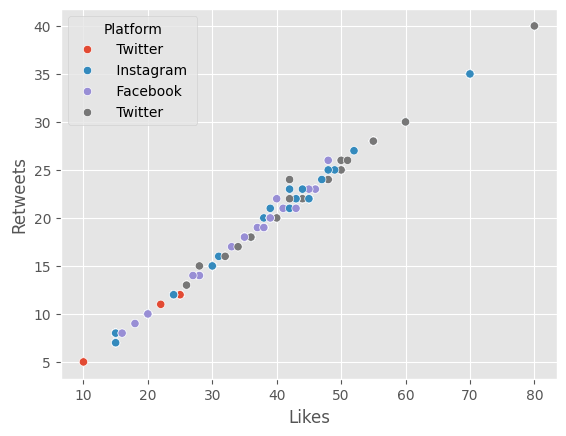

In [20]:
# creating scatter plots
sns.scatterplot(data=df, x='Likes', y='Retweets', hue = 'Platform')
plt.show()

####          • Heatmaps plots

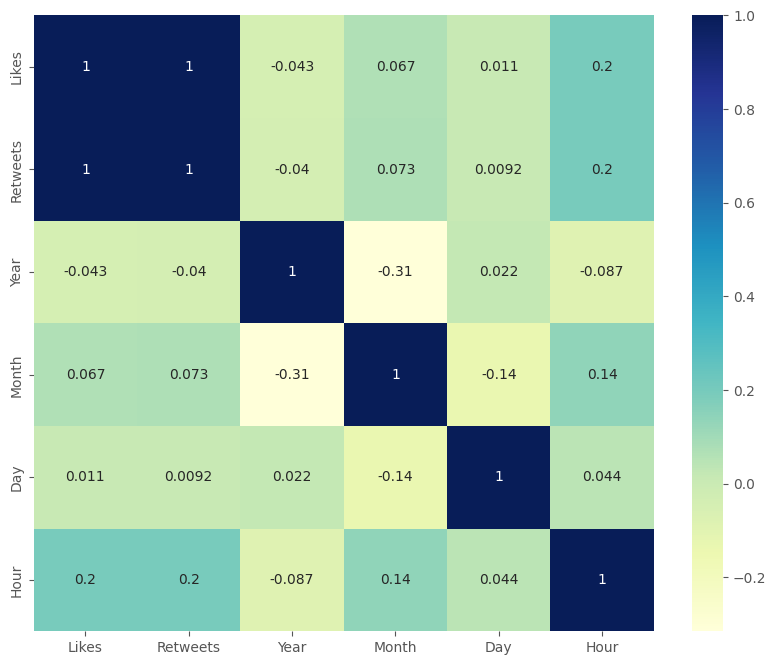

In [21]:
#creating Heatmaps for df_corr
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot = True, cmap = 'YlGnBu')
plt.show()

###          • Boxplots for **Retweets**

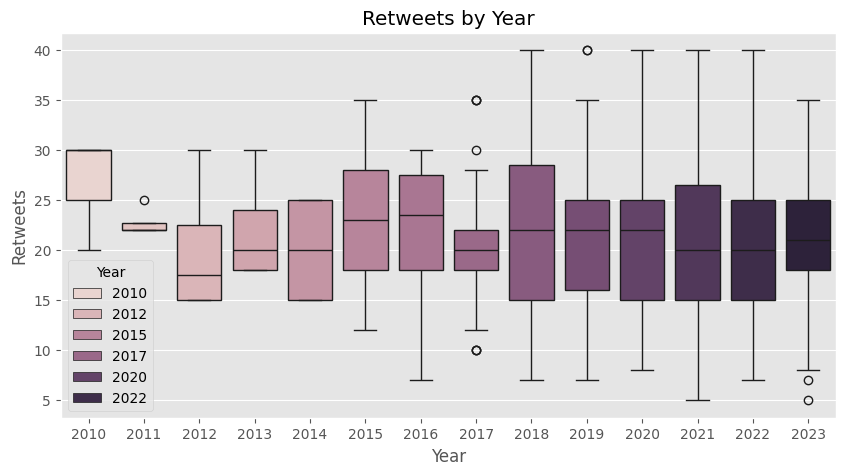

In [22]:
#creating boxplots using retweets, likes and year
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Year', y='Retweets', hue='Year')
plt.title('Retweets by Year')
plt.show()


### • Histogram for the data

#### •  Histogram for  **LIKES**

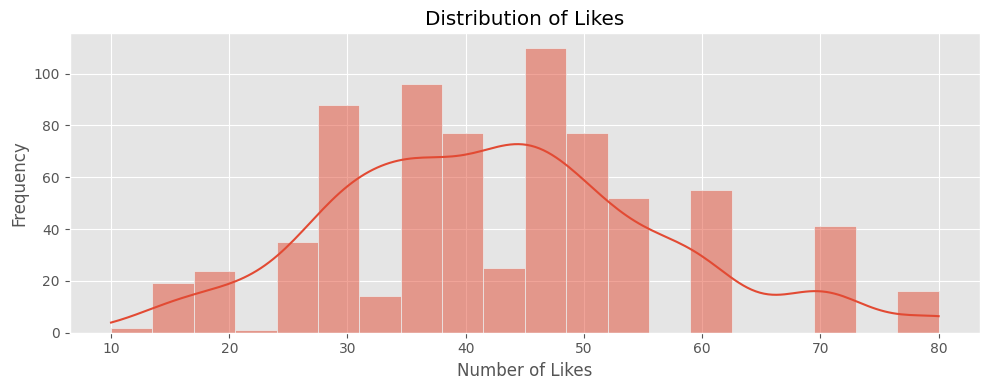

In [23]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='Likes', bins=20, kde=True)

# Add a title and labels for the axes to make the plot easy to read
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')

# Use plt.tight_layout() to ensure all labels fit within the figure
plt.tight_layout()

# Display the plot
plt.show()

#### • Histogram for Retweets

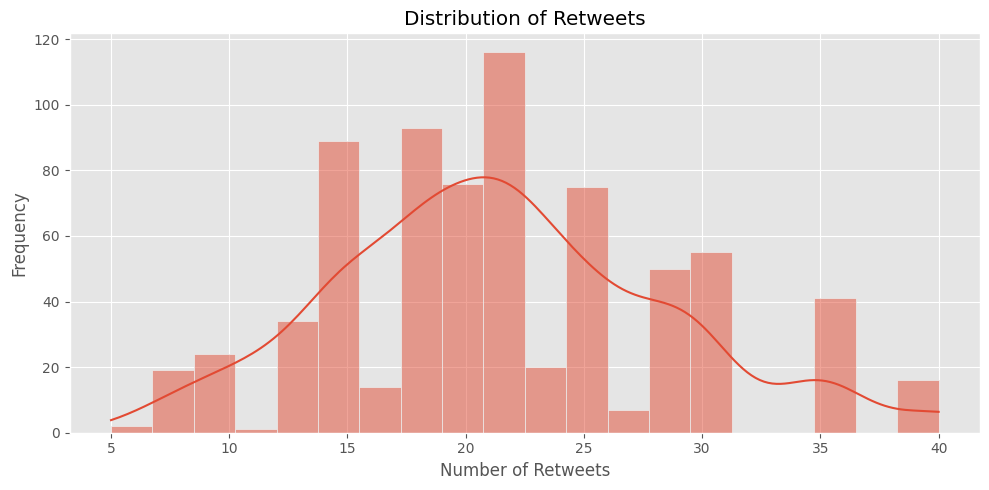

In [45]:
# The 'bins' argument controls the number of bars in the histogram
# The 'kde=True' argument adds a smooth curve to show the distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Retweets', bins=20, kde=True)

# Add a title and labels for the axes to make the plot easy to read
plt.title('Distribution of Retweets')
plt.xlabel('Number of Retweets')
plt.ylabel('Frequency')

# Use plt.tight_layout() to ensure all labels fit within the figure
plt.tight_layout()

# Display the plot
plt.show()



---




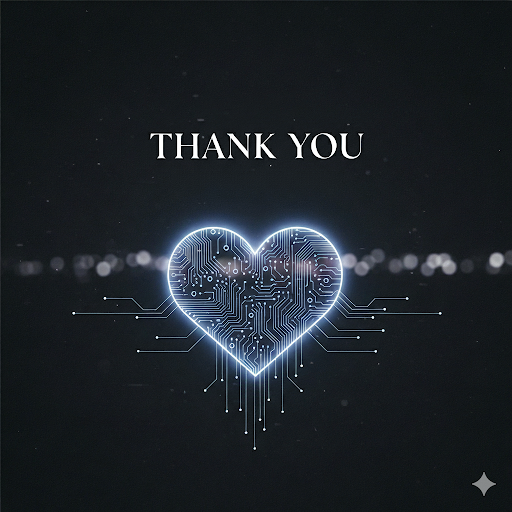